In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import requests
import json

from scipy.stats import linregress
from config import api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


595


In [3]:
#city list needs to be fixed to be able to build URLs without empty spaces for those cities with two or more words in their name. The character %20 will be added
cities_for_url=[]

for a in cities:
    b=a.replace(" ","%20")
    cities_for_url.append(b)
    
cities_for_url

['cutro',
 'mataura',
 'busselton',
 'ushuaia',
 'vaini',
 'barentsburg',
 'pala',
 'rikitea',
 'saleaula',
 'lima',
 'lebu',
 'hermanus',
 'yar-sale',
 'nome',
 'boende',
 'atuona',
 'whitehorse',
 'tuktoyaktuk',
 'georgetown',
 'victoria',
 'shelburne',
 'tabou',
 'puerto%20ayora',
 'albany',
 'xingtai',
 'kushiro',
 'polyarnyy',
 'hithadhoo',
 'belushya%20guba',
 'port%20alfred',
 'dingle',
 'nanortalik',
 'mount%20isa',
 'port%20moresby',
 'east%20london',
 'kavaratti',
 'burica',
 'bubaque',
 'yulara',
 'qaanaaq',
 'sentyabrskiy',
 'paamiut',
 'port%20elizabeth',
 'avarua',
 'the%20valley',
 'punta%20arenas',
 'butaritari',
 'tra%20vinh',
 'fortuna',
 'taolanaro',
 'fulitun',
 'bilma',
 'skelleftea',
 'kapaa',
 'rondonopolis',
 'meyungs',
 'los%20llanos%20de%20aridane',
 'mahebourg',
 'dunedin',
 'araouane',
 'schonebeck',
 'barrow',
 'chuy',
 'kodiak',
 'torbay',
 'mar%20del%20plata',
 'olafsvik',
 'sinop',
 'saskylakh',
 'castro',
 'jatiroto',
 'koubia',
 'naze',
 'bathsheba',
 

In [34]:
api_key = "3b3e1d7845d02897a766921cd3808fa3"

#This will allow to bring the right units
units="imperial"

#Creating empty lists to fill up as the requests are done inside a loop
latitude=[]
longitude=[]
temp=[]
humidity=[]
wind=[]
cloud=[]
city_name=[]

#counter to determine how many cities from "citipy" are not found in "openweathermap.com"
i=1

#creating URLs to request weather data
for name in cities_for_url:
    url='http://api.openweathermap.org/data/2.5/weather?q='
    query_url = f'{url}{name}&appid={api_key}&units={units}'
    
    response = requests.get(query_url)
    response_json = response.json()
     
    # An exception code block has to be created since the city list is built from a different site and we don't know if the same cities can be found in the second site 
    try:
        latitude.append(response_json['coord']['lat'])
        longitude.append(response_json['coord']['lon'])
        temp.append(response_json['main']['temp'])
        humidity.append(response_json['main']['humidity'])
        wind.append(response_json['wind']['speed'])
        cloud.append(response_json['clouds']['all'])
        city_name.append(response_json['name'])
    except KeyError:
        i=i+1
print(f'there are {i} cities not found')

there are 47 cities not found


In [35]:
#Creating a dictionary with the required variables to later make it a data frame
weather_dict={"Latitude":latitude,
             "Longitude":longitude,
              "Temp (F)":temp,
             "Humidity (%)":humidity,
             "Windspeed (mph)":wind,
             "Cloudiness (%)":cloud,
             "City":city_name}
weather_df=pd.DataFrame(weather_dict)
weather_df

,Latitude,Longitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City
0,39.0353,16.9819,57.11,58,14.97,0,Cutro
1,-46.1927,168.8643,60.01,95,1.01,95,Mataura
2,-33.6500,115.3333,63.63,77,1.01,100,Busselton
3,-54.8000,-68.3000,48.20,87,19.57,75,Ushuaia
4,-21.2000,-175.2000,71.60,94,8.90,75,Vaini
...,...,...,...,...,...,...,...
544,4.8845,-1.7554,83.08,75,10.22,56,Takoradze
545,5.3505,48.5268,78.21,76,17.67,99,Hobyo
546,-12.2333,136.7667,82.40,83,8.05,99,Nhulunbuy
547,55.3068,79.6802,1.71,93,12.50,96,Ubinskoye


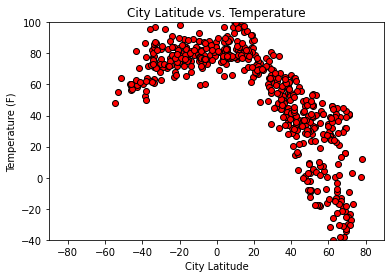

In [36]:
#creating scatter plot for temperature and latitude
plt.scatter(latitude, temp, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.ylim(-40,100)

plt.show()

In [37]:
#Comment: The above plot shows the following:
# a) The highest temperatures are indeed reached around the Ecuator or latitude zero
# b) Northern hemisphere latitudes have much lower temperatures compared to southern cities 

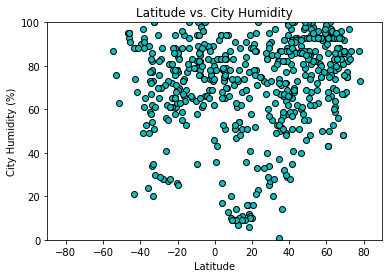

In [38]:
#creating scatter plot for humidity and latitude

plt.scatter(latitude, humidity, marker="o", facecolors="c", edgecolors="black")
plt.title("Latitude vs. City Humidity")
plt.ylabel("City Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(0,100)

plt.show()

In [39]:
#Comment: humidity seems to be more spread on northern cities compared to negative latitudes. South of the Ecuator seems to have more uniform high humidity.

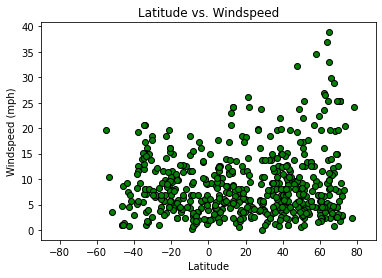

In [40]:
##creating scatter plot for humidity and latitude

plt.scatter(latitude, wind, marker="o", facecolors="g", edgecolors="black")
plt.title("Latitude vs. Windspeed")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,90)

plt.show()

In [41]:
#Comment: Overall wind speeds around 5 mph seems to have the highes frequency. Northern emisphere tends to have windier conditions as cities are further north 

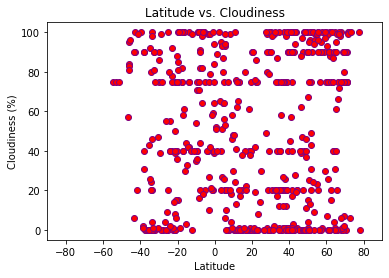

In [42]:
##creating scatter plot for cloudiness and latitude

plt.scatter(latitude, cloud,  marker="o", facecolors="r", edgecolors="purple")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)

plt.show()

In [43]:
#Comment:latitudes between -40 and -20 have a wide range of cloudiness. Betweeen -20 and 0, tend to be more overcasted. Passing the Ecuator until latitude +20, 
#cities have to be less cloudy and beyond +20 further north, cities tend to be more cloudy. This trend might be seasonal. Data pulled at the end of Feb. 

In [44]:
#breaking the data set into northern and souther cities
n_lat=[]
s_lat=[]
for var in latitude:
    if var>=0:
       n_lat.append(var)
    else:
        s_lat.append(var)
len(n_lat)

372

In [45]:
#Creating a data frame for the northern cities
n_lat_df=pd.DataFrame(n_lat)
n_lat_df["Latitude"]=n_lat_df
n_lat_df
north_df=pd.merge(weather_df,n_lat_df, on="Latitude")
north_df

,Latitude,Longitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City,0
0,39.0353,16.9819,57.11,58,14.97,0,Cutro,39.0353
1,9.3642,14.9046,100.87,9,7.54,46,Pala,9.3642
2,66.8333,70.8333,-12.91,88,12.12,72,Yar-Sale,66.8333
3,64.5011,-165.4064,-9.40,59,13.80,1,Nome,64.5011
4,60.7161,-135.0538,28.40,86,19.57,90,Whitehorse,60.7161
...,...,...,...,...,...,...,...,...
371,48.6499,-53.1147,27.91,100,5.75,100,Bonavista,48.6499
372,4.8845,-1.7554,83.08,75,10.22,56,Takoradze,4.8845
373,5.3505,48.5268,78.21,76,17.67,99,Hobyo,5.3505
374,55.3068,79.6802,1.71,93,12.50,96,Ubinskoye,55.3068


In [46]:
#Creating a data frame for the southern cities
s_lat_df=pd.DataFrame(s_lat)
s_lat_df["Latitude"]=s_lat_df
s_lat_df
south_df=pd.merge(weather_df,s_lat_df, on="Latitude")
south_df

,Latitude,Longitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City,0
0,-46.1927,168.8643,60.01,95,1.01,95,Mataura,-46.1927
1,-33.6500,115.3333,63.63,77,1.01,100,Busselton,-33.6500
2,-54.8000,-68.3000,48.20,87,19.57,75,Ushuaia,-54.8000
3,-21.2000,-175.2000,71.60,94,8.90,75,Vaini,-21.2000
4,-23.1203,-134.9692,77.65,72,9.73,78,Rikitea,-23.1203
...,...,...,...,...,...,...,...,...
174,-34.0363,23.0471,73.40,83,17.27,20,Knysna,-34.0363
175,-25.3333,-57.5333,87.80,55,6.91,20,San Lorenzo,-25.3333
176,-11.3847,43.2844,84.20,79,4.61,40,Mitsamiouli,-11.3847
177,-2.7942,10.0988,82.42,78,10.16,42,Tsogni,-2.7942


The r-squared is: 0.7170625002122896


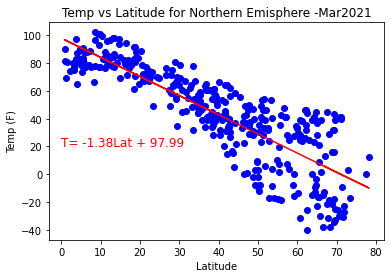

In [47]:
#Scatter plot for Northern cities - latitude vs Temp
xn_values=north_df["Latitude"]
yn_values=north_df["Temp (F)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"T= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Temp vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp (F)')
plt.savefig("../WeatherPy/images/temp_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [48]:
#Comment: negative correlation between latitude and Temp for the northern cities. Good linear fit with a r-squared above 0.7. The further from the Ecuator, 
#the colder the city

The r-squared is: 0.27096228587979143


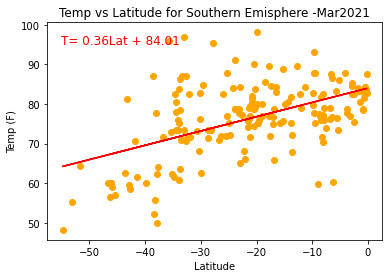

In [49]:
#Scatter plot for Southern cities - latitude vs Temp
xs_values=south_df["Latitude"]
ys_values=south_df["Temp (F)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"T= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Temp vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp (F)')
plt.savefig("../WeatherPy/images/temp_lat_south.png")

#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [50]:
#Comment: For southern cities, temperatures are more scattered. The r-sq coefficient demonstrates it with a lower value. The regression is positive, indicating that
#there's a maximum around latitude zero, since in the northern cities the regression is negative. Also, it can be seen that the regression slope is more horizontal. 
#This concludes that temperatures tend to be warmer even further south.

The r-squared is: 0.1424678815274764


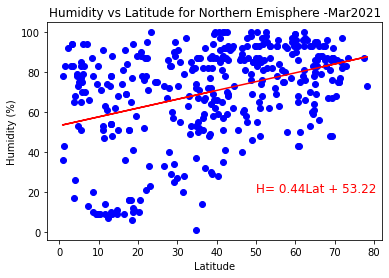

In [51]:
xn_values=north_df["Latitude"]
yn_values=north_df["Humidity (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"H= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Humidity vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../WeatherPy/images/humidity_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [52]:
#Comment: positive correlation between northern cities and humidity. The further north, the higher the humidity. Fit is not great due to spread of low humidity values. 

The r-squared is: 0.010142633025708192


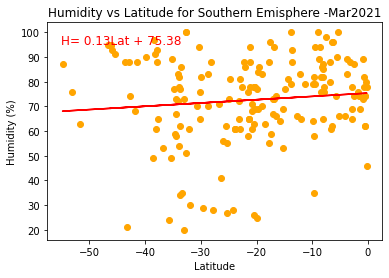

In [53]:
xs_values=south_df["Latitude"]
ys_values=south_df["Humidity (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"H= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Humidity vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../WeatherPy/images/humidity_lat_south.png")

#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [54]:
#Comment: Correlation seems to be independent between northern and southern cities. Both emispheres have similar slope and the r-sq is also similar. 

The r-squared is: 0.023969605206444144


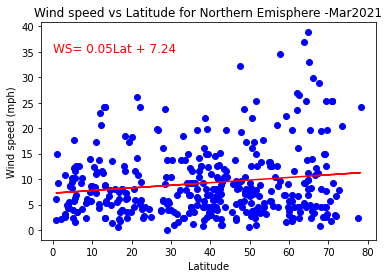

In [55]:
#Plot for wind speed northern emisphere
xn_values=north_df["Latitude"]
yn_values=north_df["Windspeed (mph)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"WS= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Wind speed vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')
plt.savefig("../WeatherPy/images/wind_speed_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [56]:
#Comment: the wind speed is slightly higher at more positive latitudes. Overall tends to range between 1 and 5 mph with some windy cities. Regression is positive with
#a small slope (0.03). Fit is poor due to effect of windy cities. There is a cluster of cities close to the Ecuator with wind speeds in the dominant range.

The r-squared is: 0.030131139763263842


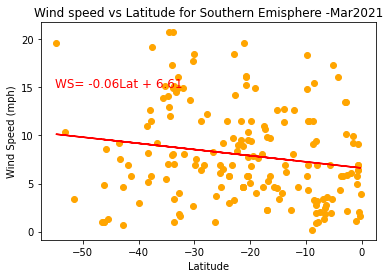

In [57]:
#Plot for wind speed southern emisphere
xs_values=south_df["Latitude"]
ys_values=south_df["Windspeed (mph)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"WS= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Wind speed vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../WeatherPy/images/wind_speed_lat_south.png")
#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


In [58]:
#Comment: Regression is negative in the Southern emisphere. It's positive in the Northern. This indicates that there's a minimum in the trend around latitud zero.
#Slope is more negative compared to the slope of the northern emisphere. Again, a cluster of cities around the Ecuator can be seen in this plot. 

The r-squared is: 0.013094722217600925


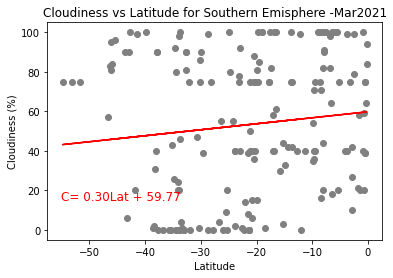

In [59]:
#Plot for Cloudiness southern emisphere
xs_values=south_df["Latitude"]
ys_values=south_df["Cloudiness (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"C= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="gray")
plt.title("Cloudiness vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../WeatherPy/images/cloud_lat_south.png")
#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [60]:
#Comment: positive linear regression. Consistent with more clouds as we move further north. Poor linear fit, cloudiness spread around. 

The r-squared is: 0.03974935689928189


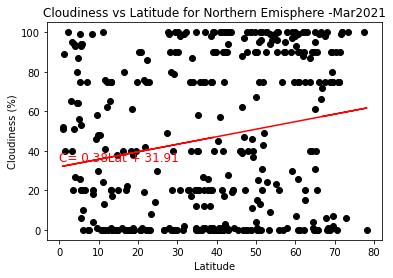

In [61]:
#Plot for wind speed northern emisphere
xn_values=north_df["Latitude"]
yn_values=north_df["Cloudiness (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"C= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="black")
plt.title("Cloudiness vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../WeatherPy/images/cloud_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [62]:
#Comment: positive linear regression. Consistent with more clouds as we move further north. Poor linear fit, cloudiness spread around. Analyzing both hemisphere by
#by separate, trends is always positive and slope is similar. Conclusion is that regardless of the fit, cloudiness seems to be greater as we move north. 

In [63]:
weather_df.to_csv(r'C:/Users/oscar/Desktop/Repos/python-api-challenge/WeatherPy/csv/weather_lat_data.csv')